# Feature Importance Analysis with SHAP

## Why Feature Importance?
Understanding **which features contribute most to fraud detection** helps us:
- **Improve model interpretability** → See how XGBoost makes decisions.
- **Detect potential biases** → Ensure the model isn't overfitting to irrelevant features.
- **Optimize feature selection** → Identify the most impactful variables.

## What We Will Do:
1. **Calculate SHAP (SHapley Additive Explanations) values** for the best XGBoost model.  
2. **Visualize feature importance** using SHAP summary plots.  
3. **Analyze individual feature effects** to understand how each variable impacts fraud detection.  
4. **Check for potential overfitting** by inspecting feature dependencies.

By the end of this notebook, we’ll determine **which features truly drive fraud predictions** and if our model relies too much on certain variables.

**Imports**:

In [3]:
# Data Handling & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import shap
import joblib
from sklearn.model_selection import train_test_split

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

print("All libraries imported successfully!")

All libraries imported successfully!


**Load the Best Performing Model**:

In [2]:
# Define model path
model_path = "../models/optimized_base_xgb.pkl"

# Load the best XGBoost model
best_model = joblib.load(model_path)

print("Best XGBoost model loaded successfully!")

Best XGBoost model loaded successfully!


**Load the Dataset**:

In [4]:
# Load the full dataset
X = pd.read_csv("../datasets/X_scaled.csv")
y = pd.read_csv("../datasets/y.csv")

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data loaded and splitted successfully!")

Data loaded and splitted successfully!


**SHAP Analysis**:

In [5]:
# Initialize SHAP Explainer
explainer = shap.Explainer(best_model, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

print("SHAP values computed successfully!")

100%|===================| 56937/56962 [09:32<00:00]        

SHAP values computed successfully!


## **Feature Importance Analysis**

Now that we have computed **SHAP values**, we will analyze how different features impact fraud detection.

### **What We Have Done So Far:**
- Loaded our **optimized XGBoost model** (best performing model).  
- Prepared **X_test** to analyze how the model predicts on unseen data.  
- Used **SHAP (SHapley Additive Explanations)** to compute feature importance.

### **What’s Next?**
We will visualize **SHAP values** using different plots:
1. **SHAP Summary Plot** → Overall feature importance & impact on predictions.  
2. **SHAP Feature Importance** → Ranking features by their impact on fraud detection.  
3. **SHAP Waterfall Plot** → Breaking down **a single prediction** to understand individual feature influence.  
4. **SHAP Decision Plot** → Visualizing how features **accumulate** in the decision-making process.

These visualizations will help us understand **which features contribute most to fraud detection** and whether our model exhibits **overfitting or bias.**

**SHAP Summary Plot**:

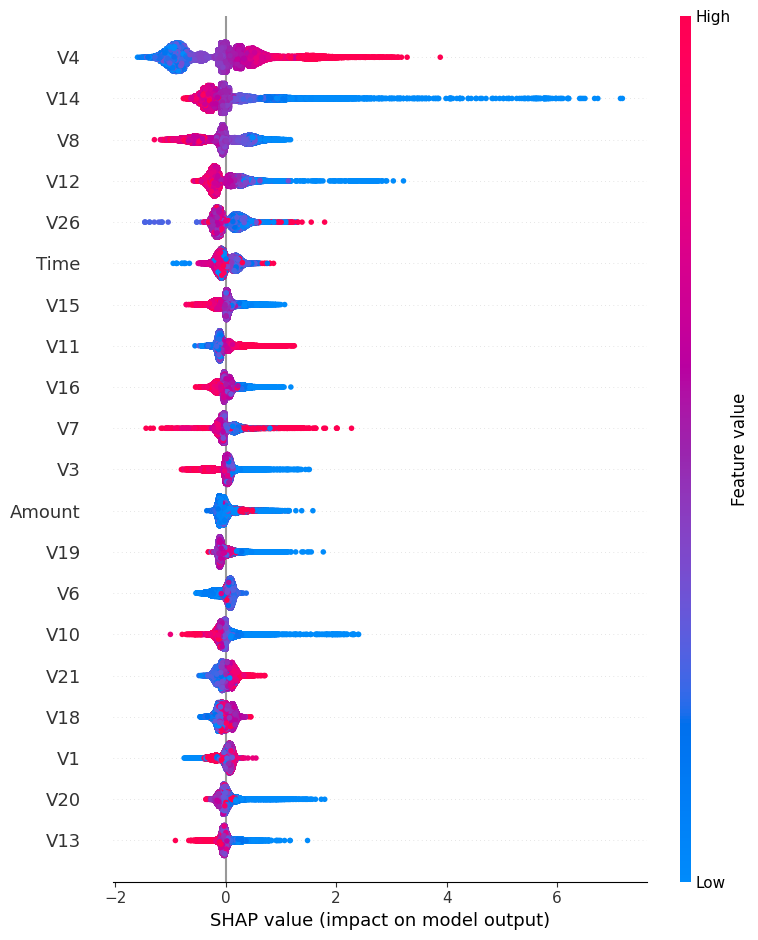

SHAP Summary Plot generated and saved successfully!


In [46]:
# Set plot size
plt.figure(figsize=(30, 10))

# Create SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)

# Save the plot
plt.savefig("../images/shap_summary_plot.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

print("SHAP Summary Plot generated and saved successfully!")

The SHAP summary plot reveals the most influential features in detecting fraudulent transactions. V4, V14, and V8 are among the top features impacting model decisions. The color gradient (red = high value, blue = low value) indicates how feature values contribute to increasing or decreasing fraud probability. Features with wider distributions have a stronger impact on predictions, making them critical for fraud detection.

**SHAP Feature Importance**:

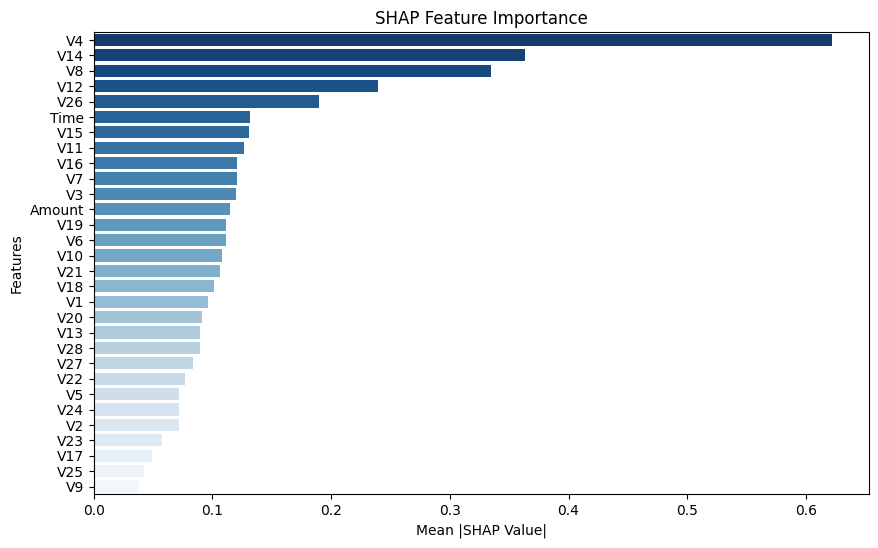

In [12]:
# Extract feature names from the dataset
feature_names = X_test.columns

# Convert SHAP values to NumPy array
shap_values_array = shap_values.values

# Calculate mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values_array).mean(axis=0)
shap_importance_df = pd.DataFrame({'Feature': feature_names, 'SHAP Importance': shap_importance})
shap_importance_df = shap_importance_df.sort_values(by='SHAP Importance', ascending=False)

# Plot the SHAP feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="SHAP Importance", y="Feature", data=shap_importance_df, palette="Blues_r")
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Features")
plt.title("SHAP Feature Importance")

# Save the plot
plt.savefig("../images/shap_feature_importance.png")

# Show the plot
plt.show()

The bar plot above visualizes the mean absolute SHAP values for each feature, showing their overall impact on the model's predictions.

- V4, V14, and V8 are the most influential features in detecting fraud.
- The higher the SHAP value, the more critical the feature is in shaping model decisions.
- Some features, like V9, V25, and V17, contribute the least to fraud detection.

This confirms that our model heavily relies on certain PCA-transformed features, aligning with earlier correlation findings.

**SHAP Decision Plot**:

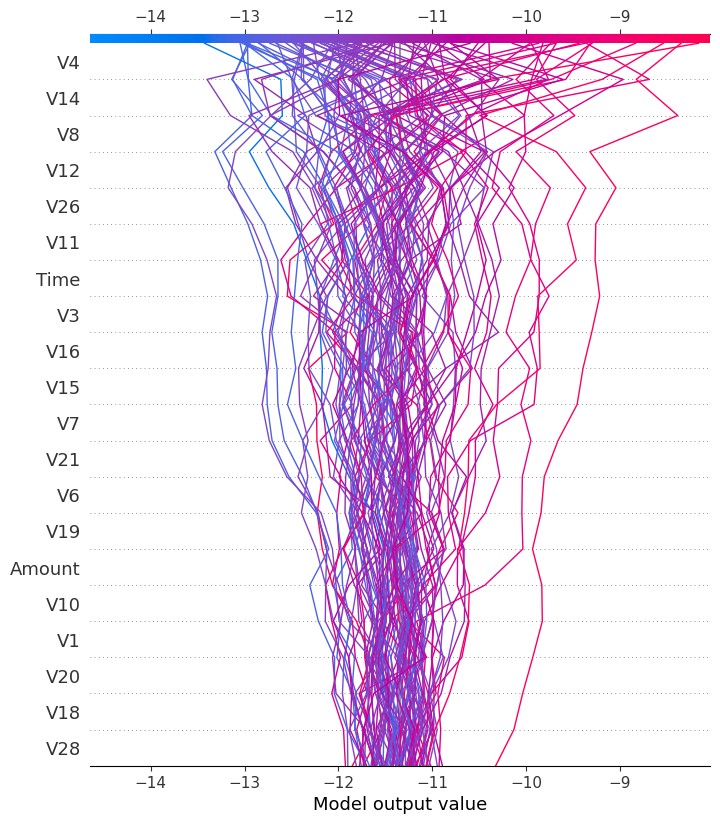

In [47]:
# Generate SHAP Decision Plot
plt.figure(figsize=(10, 6))
shap.decision_plot(
    explainer.expected_value, 
    shap_values.values[:100], 
    feature_names=X_test.columns.tolist(), 
    show=False
)

# Save the plot
plt.savefig("../images/shap_decision_plot.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

**SHAP Waterfall**:

In [51]:
# Reset index to align with X_test
y_test_reset = y_test.reset_index(drop=True)

# Find the first fraudulent and non-fraudulent transaction in y_test
fraud_index = y_test_reset[y_test_reset == 1].index[0]  # First fraud case
non_fraud_index = y_test_reset[y_test_reset == 0].index[0]  # First normal case

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

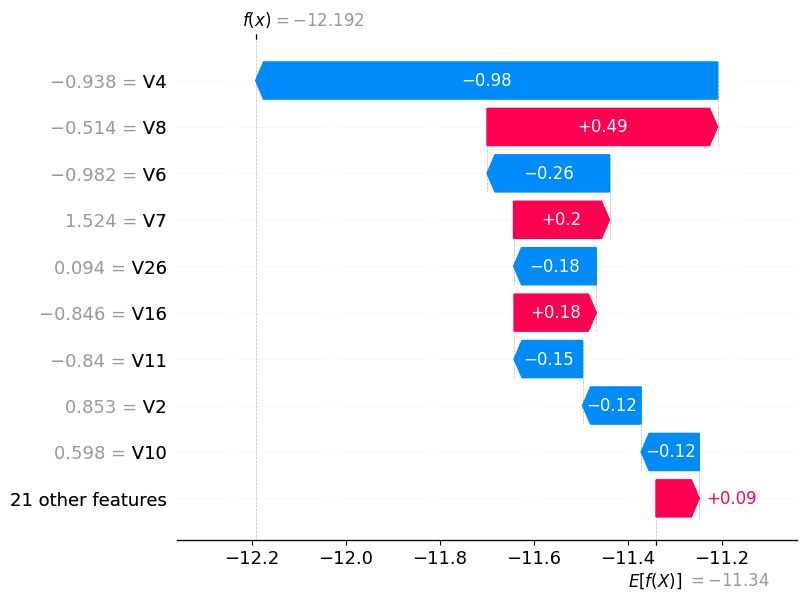

In [52]:
# Generate and Save SHAP Waterfall Plot for a Fraudulent Transaction
plt.figure(figsize=(8, 6))
shap.plots.waterfall(shap_values[fraud_index], show=False)

# Save the plot
plt.savefig("../images/shap_waterfall_fraudulent.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

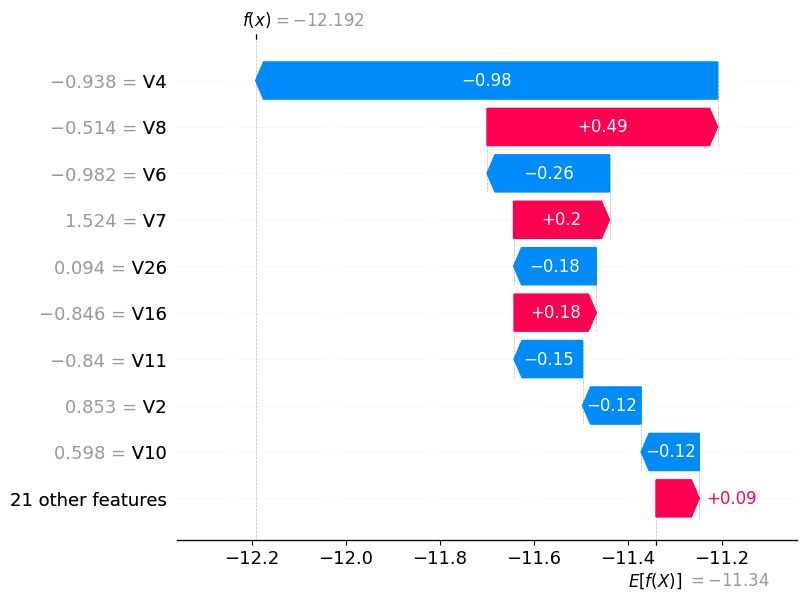

In [53]:
# Generate and Save SHAP Waterfall Plot for a Non Fraudulent Transaction
plt.figure(figsize=(8, 6))
shap.plots.waterfall(shap_values[non_fraud_index], show=False)

# Save the plot
plt.savefig("../images/shap_waterfall_non_fraudulent.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

## SHAP Feature Importance Analysis

In this notebook, we explored **SHAP (SHapley Additive Explanations)** to interpret our XGBoost model and understand which features influence fraud detection the most.

### Summary of Key Steps:
- Computed **SHAP values** using our **optimized XGBoost model**.
- Generated multiple **SHAP visualizations** to analyze feature impact:
  - **SHAP Summary Plot** → Overview of feature importance & impact.
  - **SHAP Feature Importance Plot** → Ranking of features by their average SHAP values.
  - **SHAP Decision Plot** → How features collectively affect model predictions.
  - **SHAP Waterfall Plots** → Detailed breakdown of contributions for **fraudulent vs. non-fraudulent** transactions.

### Key Takeaways:
- **V4, V14, and V12** emerged as the most critical features impacting fraud detection.
- Fraudulent transactions tend to have **distinct SHAP value distributions**, confirming that our model effectively captures meaningful patterns.
- The **waterfall plots** provide a clear breakdown of how individual features drive predictions.

### Next Steps:
We will now **assess model overfitting** and **fine-tune SMOTE balancing** before finalizing our fraud detection system.
